##### Copyright 2020 The TensorFlow Authors.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import cv2
import pickle

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
# load data from path:
import os

b_path = '/Users/ryan/Desktop/bad_ic2'
g_path = '/Users/ryan/Documents/PCB_Image/images'
bimg_list = os.listdir(b_path)
gimg_list = os.listdir(g_path)
for gimg in gimg_list:
    if  gimg == 's01':
      path = os.listdir(os.path.join(g_path, gimg, 'DSLR', 'components', 'front', 'ICs'))
    elif gimg == 's30':
        path = os.listdir(os.path.join(g_path, gimg, 'DSLR', 'components', gimg +'_front', 'ICs'))
    elif gimg == 's10':  
        path = os.listdir(os.path.join(g_path, gimg, 'DSLR', 'components', gimg +'_front', 'ICs'))
    
    else:
        path = os.listdir(os.path.join(g_path, gimg, 'DSLR', 'components', gimg.replace('0', '') +'_front', 'ICs'))


In [3]:
os.path.join(b_path,files)

NameError: name 'files' is not defined

In [13]:
import cv2
import imutils

IMG_SZE = 400

X, y = [], []
for files in bimg_list:
    img_array = cv2.imread(os.path.join(b_path,files), cv2.IMREAD_GRAYSCALE)
    img_array = cv2.resize(img_array, (IMG_SZE, IMG_SZE))
    img_array1 = np.array(img_array).reshape(IMG_SZE, IMG_SZE)

    X.append(img_array1)
    y.append('bad')
    '''
    image = imutils.rotate(img_array, angle=90)
    image = np.array(image).reshape(IMG_SZE, IMG_SZE)

    X.append(image)
    y.append('bad')
    
    image = imutils.rotate(img_array, angle=180)
    image = np.array(image).reshape(IMG_SZE, IMG_SZE)

    X.append(image)
    y.append('bad')
    '''
    image = imutils.rotate(img_array, angle=270)
    image = np.array(image).reshape(IMG_SZE, IMG_SZE)

    X.append(image)
    y.append('bad')

for gimg in gimg_list:
    if  gimg == 's01':
      path = os.path.join(g_path, gimg, 'DSLR', 'components', 'front', 'ICs')
    elif gimg == 's30':
        path = os.path.join(g_path, gimg, 'DSLR', 'components', gimg +'_front', 'ICs')
    elif gimg == 's10':  
        path = os.path.join(g_path, gimg, 'DSLR', 'components', gimg +'_front', 'ICs')
    
    else:
        path = os.path.join(g_path, gimg, 'DSLR', 'components', gimg.replace('0', '') +'_front', 'ICs')
    for _ in os.listdir(path):

        img_array = cv2.imread(os.path.join(path, _), cv2.IMREAD_GRAYSCALE)
        
        img_array = cv2.resize(img_array, (IMG_SZE, IMG_SZE))
        img_array1 = np.array(img_array).reshape(IMG_SZE, IMG_SZE)

        X.append(img_array1)
        y.append('good')
        '''
        image = imutils.rotate(img_array, angle=90)
        image = np.array(image).reshape(IMG_SZE, IMG_SZE)

        X.append(image)
        y.append('good')
        '''
        image = imutils.rotate(img_array, angle=180)
        image = np.array(image).reshape(IMG_SZE, IMG_SZE)

        X.append(image)
        y.append('good')

        '''
        image = imutils.rotate(img_array, angle=270)
        image = np.array(image).reshape(IMG_SZE, IMG_SZE)

        X.append(image)
        y.append('good')
        '''
X = np.array(X)

In [14]:
X = X.astype('float32') / 255
labels = np.array([1 if it == 'good' else 0 for it in y])


pkl_dic_forimage = {'images': X, 'labels': labels}
import pickle
from typing import Protocol
with open('/Users/ryan/Documents/PCB_Image/image_data.pkl', 'wb') as f:
    pickle.dump(pkl_dic_forimage, f, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:
with open('/Users/ryan/Documents/PCB_Image/image_data.pkl', 'rb') as f:
    data = pickle.load(f)
X = data['images']
labels = data['labels']

X_g = X[labels==1]
labels_g = labels[labels==1]
X_b = X[labels==0]
labels_b = labels[labels==0]
x_train, x_test, y_train, y_test = train_test_split(X_g, labels_g, test_size = 0.3)


x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

X_b = X_b[..., tf.newaxis]
print (x_train.shape)
print (x_test.shape)

print(X_b.shape)

(201, 400, 400, 1)
(87, 400, 400, 1)
(10, 400, 400, 1)


In [16]:
idx = np.arange(0, len(X_b), 1)
import random
random.shuffle(idx)
X_b1 = X_b[idx, :, :]


In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model
from random import randint
import numpy as np

encoder = models.Sequential()

encoder.add(layers.Conv2D(32, 3, strides=1, padding='same', activation='elu', input_shape=x_train.shape[1:]))
encoder.add(layers.MaxPooling2D(2, strides=2))

encoder.add(layers.Conv2D(64, 3, strides=1, padding='same', activation='elu'))
encoder.add(layers.MaxPooling2D(2, strides=2))

encoder.add(layers.Conv2D(128, 3, strides=1, padding='same', activation='elu'))
encoder.add(layers.MaxPooling2D(2, strides=2))

encoder.summary()

print("-"*50)

decoder = models.Sequential()

decoder.add(layers.Conv2D(128, 3, strides=1, padding='same', activation='elu', input_shape=encoder.output.shape[1:]))
decoder.add(layers.UpSampling2D(2))

decoder.add(layers.Conv2D(16, 3, strides=1, padding='same', activation='elu'))
decoder.add(layers.UpSampling2D(2))

decoder.add(layers.Conv2D(3, 3, strides=1, padding='same', activation='elu'))
decoder.add(layers.UpSampling2D(2))

decoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 400, 400, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 200, 200, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 200, 200, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 128)     73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 128)       0         
Total params: 92,672
Trainable params: 92,672
Non-trainable params: 0
__________________________________________________

In [18]:

from tensorflow import keras
conv_autoencoder1 = keras.models.load_model('/Users/ryan/Documents/PCB_Image/conv_autoencoder.h5')

In [19]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
conv_autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.outputs))

conv_autoencoder.compile(optimizer='adam', loss=losses.mean_squared_error)

history = conv_autoencoder.fit(x_train, x_train, batch_size=17, epochs=14, callbacks=[callback], validation_data=None)
#conv_autoencoder.save('/Users/ryan/Documents/PCB_Image/conv_autoencoder.h5')

decoded_imgs = conv_autoencoder.predict(x_test)


Epoch 1/14


2022-12-08 08:05:05.735053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 11s 778ms/step - loss: 0.0305
Epoch 2/14
12/12 [==============================] - 10s 799ms/step - loss: 0.0104
Epoch 3/14
12/12 [==============================] - 9s 795ms/step - loss: 0.0067
Epoch 4/14
12/12 [==============================] - 9s 779ms/step - loss: 0.0056
Epoch 5/14
12/12 [==============================] - 10s 815ms/step - loss: 0.0046
Epoch 6/14
12/12 [==============================] - 9s 759ms/step - loss: 0.0040
Epoch 7/14
12/12 [==============================] - 10s 803ms/step - loss: 0.0038
Epoch 8/14
12/12 [==============================] - 9s 782ms/step - loss: 0.0034
Epoch 9/14
12/12 [==============================] - 9s 762ms/step - loss: 0.0031
Epoch 10/14
12/12 [==============================] - 9s 765ms/step - loss: 0.0033
Epoch 11/14
12/12 [==============================] - 9s 764ms/step - loss: 0.0028
Epoch 12/14
12/12 [==============================] - 9s 757ms/step - loss: 0.0027
Epoch 13/14
12/12 [=============

2022-12-08 08:07:18.009135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [20]:
from tensorflow import keras
conv_autoencoder1 = keras.models.load_model('/Users/ryan/Documents/PCB_Image/conv_autoencoder.h5')
decoded_imgsG = conv_autoencoder1.predict(x_test)
#decoded_imgs = conv_autoencoder1.predict(x_test)

decoded_imgsB = conv_autoencoder1.predict(X_b1)


2022-12-08 08:07:19.371002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


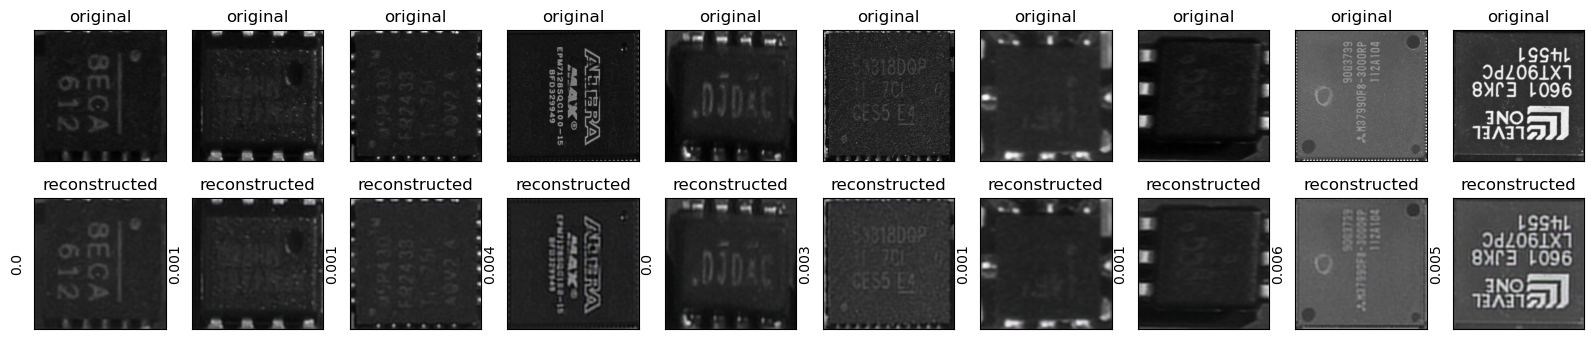

In [26]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgsG[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  #ax.get_yaxis().set_visible(False)
  ax.set_yticks([])
  ax.set_ylabel(mean_squared_error(x_test[i][:,:,0], decoded_imgsG[i][:,:,0]).round(3))
plt.show()

In [22]:
idx = np.arange(0, len(X_b), 1)
import random
random.shuffle(idx)
X_b1 = X_b[idx, :, :]

decoded_imgsB = conv_autoencoder1.predict(X_b1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


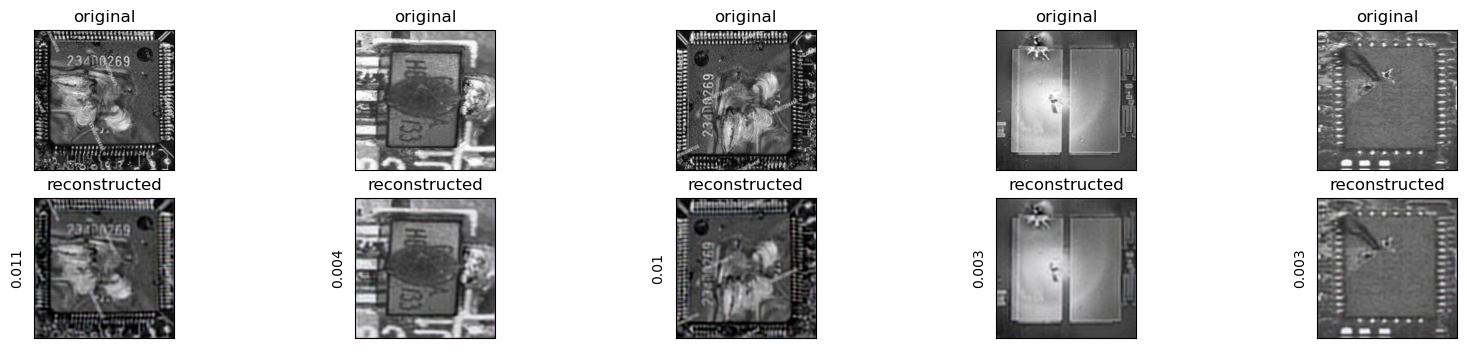

In [23]:
idx = np.arange(0, len(X_b), 1)
import random
random.shuffle(idx)
decoded_imgsB[idx, :, :]
n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_b1[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgsB[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  #ax.get_yaxis().set_visible(False)
  ax.set_yticks([])
  ax.set_ylabel(mean_squared_error(X_b1[i][:,:,0], decoded_imgsB[i][:,:,0]).round(3))
plt.show()

In [24]:
hist_b = []
x = 0
for i in X_b:
    hist_b.append(mean_squared_error(X_b[x][:,:, 0], decoded_imgsB[x][:,:, 0]).mean())
    x+=1



hist_g = []
x = 0
for i in x_test:
    hist_g.append(mean_squared_error(x_test[x][:,:, 0], decoded_imgsG[x][:,:, 0]).mean())
    x+=1

In [95]:
np.median(np.array(hist_g))

0.0013009638

In [96]:
(np.array(hist_g) <=0.00195782056).sum() 

54

In [43]:
bad = [0 if te > 0.002 else 1 for te in  np.array(hist_b)]
good = [0 if te < 0.003  else 1 for te in  np.array(hist_g)]

print(f'The percent "good" components scored as "bad" is % {100*round(1-sum(good)/len(good),2)}')
print(f'The percent "bad" components scored as "good" is % {100*round(1-sum(bad)/len(bad),2)}')

The percent "good" components scored as "bad" is % 75.0
The percent "bad" components scored as "good" is % 100.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


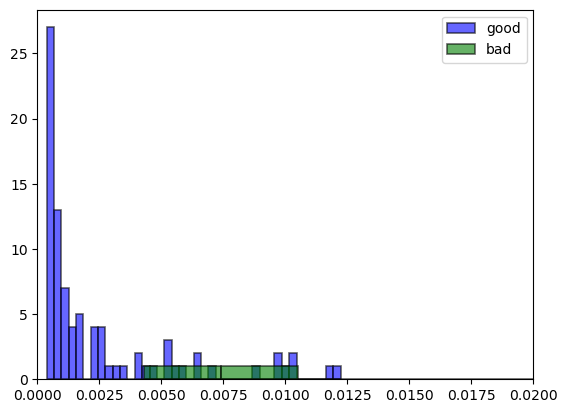

In [27]:
plt.figure()
plt.hist(hist_g, bins = 40, alpha = 0.6, edgecolor='black', 
        color  = 'blue', linewidth=1.2)
plt.legend()

plt.hist(hist_b, bins = 40, alpha = 0.6, edgecolor='black', 
        color = 'green', linewidth=1.2)
plt.legend(['good','bad'])

plt.xlim(0, 0.02)
plt.show()

2022-12-08 07:04:56.357413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


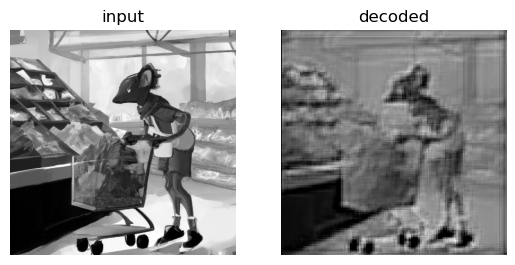

In [99]:
IMG_SZE = 400
img_array = cv2.imread('/Users/ryan/Desktop/arat.png', cv2.IMREAD_GRAYSCALE)
img_array = cv2.resize(img_array, (IMG_SZE, IMG_SZE))
img_array1 = np.array(img_array).reshape(IMG_SZE, IMG_SZE)

img_array1 = img_array1[..., tf.newaxis]
img_array1.reshape(-1, 400, 400, 1)
decoded_imgs = conv_autoencoder.predict(img_array1.reshape(-1, 400, 400, 1))
new_decode = decoded_imgs.reshape(400, 400,3)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_array1, cmap = 'gray')
ax[1].imshow(new_decode[:,:,0], cmap = 'gray')
ax[0].set_title('input')
ax[1].set_title('decoded')
ax[0].set_axis_off()
ax[1].set_axis_off()




In [100]:
mean_squared_error(new_decode[:,:, 0], img_array1[:,:, 0])

18344.033

2022-12-06 19:01:56.146591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
